In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [2]:
data_dir = os.getcwd()
print(data_dir)

C:\Users\Raven\Desktop\Masters-Projects\Visual Computing Lab\ResNetText


In [3]:
data_transforms = {
    'ClassDS': transforms.Compose([ # Dataset for Training
        transforms.Resize(224),
        #transforms.RandomResizedCrop(224), # Random Resized Crop is not well suited for this database
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'ClassVal': transforms.Compose([ # Dataset for Evaulation
        transforms.Resize(224),
        #transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [4]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['ClassDS', 'ClassVal']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=10,
                                             shuffle=True, num_workers=10)
              for x in ['ClassDS', 'ClassVal']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['ClassDS', 'ClassVal']}

In [5]:
class_names = image_datasets['ClassDS'].classes
print(class_names)

['Apple-Sliced', 'Apple-Whole', 'Carrot-Sliced', 'Carrot-Whole', 'Cauliflower-Mashed', 'Eggs-Beaten', 'Meat-Ground', 'Onion-Sliced']


In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

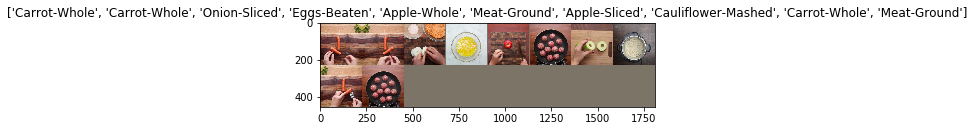

In [7]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['ClassDS']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [8]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['ClassVal']):

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [9]:
def train_model(model, criterion, optimizer, num_epochs=25):
  
    model.train()
    for epochs in range(0, num_epochs):
        step = 0
        print("Epochs ", epochs)
        for inputs, labels in dataloaders['ClassDS']: 
            step = step + 1
            
            optimizer.zero_grad()
            output = model(inputs)

            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            print(step)
            
            
        print(loss)
        _, preds = torch.max(output, 1)
        print(preds)
        print(labels)

    return model

In [10]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.003, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [11]:
model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

Epochs  0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
tensor(0.4454)
tensor([ 5,  7,  1,  5,  0])
tensor([ 5,  7,  1,  5,  7])
Epochs  1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
tensor(1.00000e-02 *
       2.5304)
tensor([ 7,  6,  1,  1,  3])
tensor([ 7,  6,  1,  1,  3])
Epochs  2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
tensor(1.00000e-02 *
       2.3616)
tensor([ 1,  6,  7,  4,  7])
tensor([ 1,  6,  7,  4,  7])
Epochs  3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
tensor(1.00000e-02 *
       3.8742)
tensor([ 4,  3,  6,  5,  3])
tensor([ 4,  3,  6,  5,  3])
Epochs  4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
tensor(0.1709)
tensor([ 0,  1,  4,  4,  1])
tensor([ 0,  1,  4,  4,  1])
Epochs  5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
tensor(0.1301)
tensor([ 0,  0,  6,  6,  3])
tensor([ 0,  0,  6,  6,  3])
Epochs  6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [13]:
count = 0
right = 0
for i, (inputs, labels) in enumerate(dataloaders['ClassDS']):
    output = model_ft(inputs)
    _, preds = torch.max(output, 1)
    #print(i)
    #print(preds)
    #print(labels)
    for j in range(len(preds)):
        if(preds[j] == labels[j]):
            right = right + 1
        
        count = count + 1
    #print("----")
print("DS Accuracy: ", right/count)

DS Accuracy:  1.0


In [14]:
count = 0
right = 0
for i, (inputs, labels) in enumerate(dataloaders['ClassVal']):
    output = model_ft(inputs)
    _, preds = torch.max(output, 1)
    #print(i)
    #print(preds)
    #print(labels)
    for j in range(len(preds)):
        if(preds[j] == labels[j]):
            right = right + 1
        
        count = count + 1
    #print("----")
print("Eval Accuracy: ", right/count)

Eval Accuracy:  0.5333333333333333


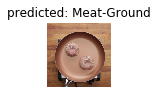

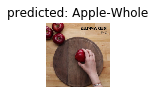

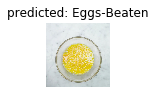

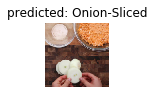

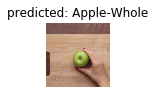

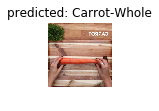

In [16]:
visualize_model(model_ft, 6)

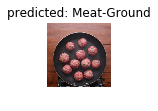

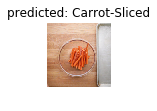

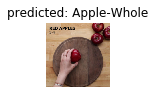

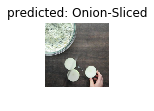

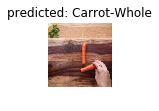

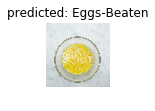

In [17]:
visualize_model(model_ft, 6)

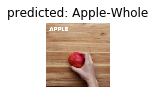

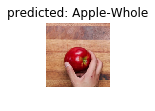

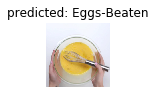

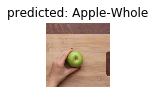

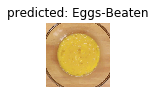

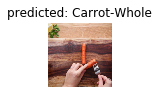

In [18]:
visualize_model(model_ft, 6)

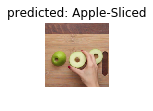

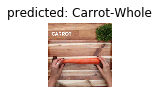

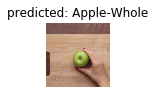

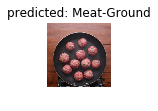

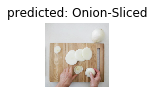

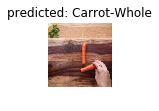

In [19]:
visualize_model(model_ft, 6)

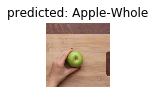

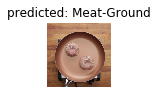

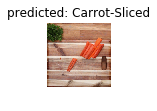

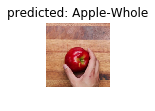

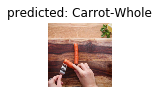

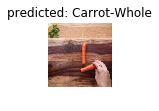

In [20]:
visualize_model(model_ft, 6)